##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

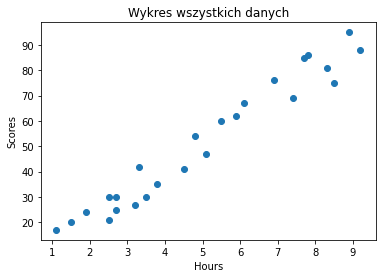

Współczyniik coef [9.00890869]
Współczynnik intercept 7.714922048997778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


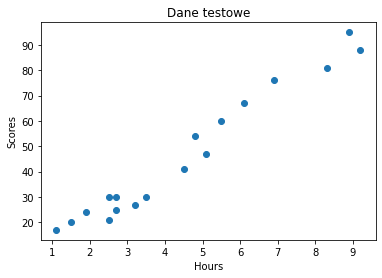

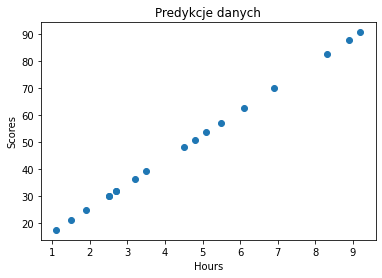

bląd bezwględny 4.5203538728037636
bląd sredniokwadratowy 30.4271651953887
pierwiastek_blau_sredniokwadratowego 5.516082413759669


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression

ds = pd.read_csv('SCORES.csv')
plt.scatter(ds['Hours'],ds['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Wykres wszystkich danych')
plt.show()
X = ds['Hours']
y = ds['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)
regr = LinearRegression()
regr.fit(X_train[:, np.newaxis], y_train)
print("Współczyniik coef " + str(regr.coef_))
print("Współczynnik intercept " + str(regr.intercept_))
pred_y = regr.predict(X_test[:, np.newaxis])
plt.scatter(X_test, y_test)
plt.title("Dane testowe")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
plt.scatter(X_test, pred_y)
plt.title("Predykcje danych")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
blad_bezwzgledny = mean_absolute_error(y_test, pred_y)
print("bląd bezwględny " + str(blad_bezwzgledny))
blad_sredniokwadratowy = mean_squared_error(y_test, pred_y)
print("bląd sredniokwadratowy " + str(blad_sredniokwadratowy))
pierwiastek_blau_sredniokwadratowego = np.sqrt(blad_sredniokwadratowy)
print("pierwiastek_blau_sredniokwadratowego " + str(pierwiastek_blau_sredniokwadratowego))

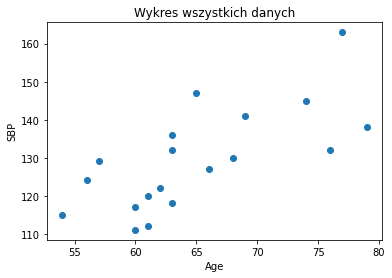

Współczyniik coef [1.37078652]
Współczynnik intercept 40.26966292134834


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


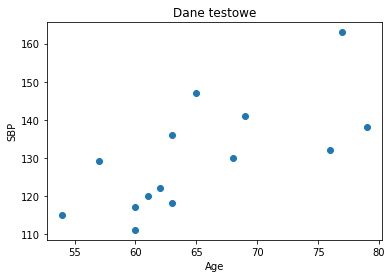

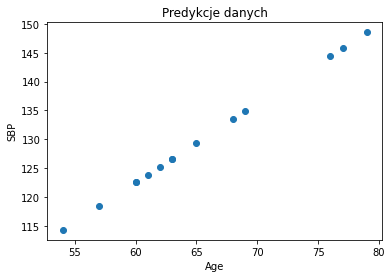

bląd bezwględny 8.63804173354735
bląd sredniokwadratowy 99.0161325229498
pierwiastek_blau_sredniokwadratowego 9.950685027823452


In [146]:
ds = pd.read_csv('SBP.csv')
plt.scatter(ds['Age'],ds['SBP'])
plt.xlabel('Age')
plt.ylabel('SBP')
plt.title('Wykres wszystkich danych')
plt.show()
X = ds['Age']
y = ds['SBP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)
regr = LinearRegression()
regr.fit(X_train[:, np.newaxis], y_train)
print("Współczyniik coef " + str(regr.coef_))
print("Współczynnik intercept " + str(regr.intercept_))
pred_y = regr.predict(X_test[:, np.newaxis])
plt.scatter(X_test, y_test)
plt.title("Dane testowe")
plt.xlabel('Age')
plt.ylabel('SBP')
plt.show()
plt.scatter(X_test, pred_y)
plt.title("Predykcje danych")
plt.xlabel('Age')
plt.ylabel('SBP')
plt.show()
blad_bezwzgledny = mean_absolute_error(y_test, pred_y)
print("bląd bezwględny " + str(blad_bezwzgledny))
blad_sredniokwadratowy = mean_squared_error(y_test, pred_y)
print("bląd sredniokwadratowy " + str(blad_sredniokwadratowy))
pierwiastek_blau_sredniokwadratowego = np.sqrt(blad_sredniokwadratowy)
print("pierwiastek_blau_sredniokwadratowego " + str(pierwiastek_blau_sredniokwadratowego))

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

Współczyniik coef [2104.0765271]
Współczynnik intercept -656.5680817191416
Współczyniik coef [0.04196187]
Współczynnik intercept 413.70706021420614
Współczyniik coef [-0.00587684]
Współczynnik intercept 632.2805099693397
Współczyniik coef [-80.64228935]
Współczynnik intercept 1210.268680445151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

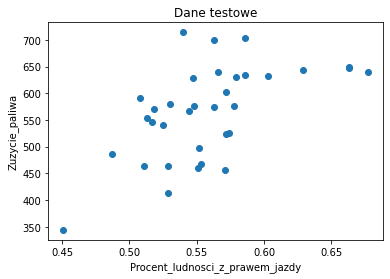

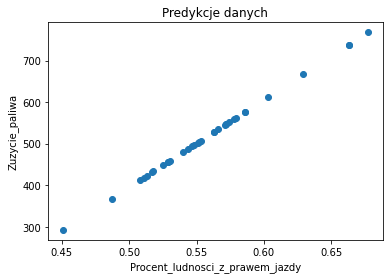

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


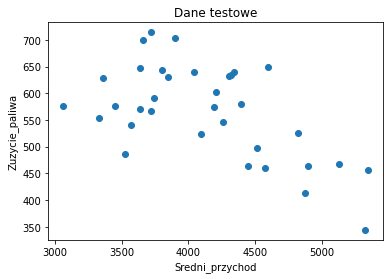

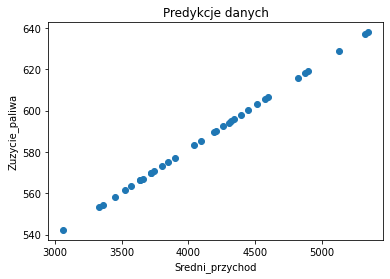

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


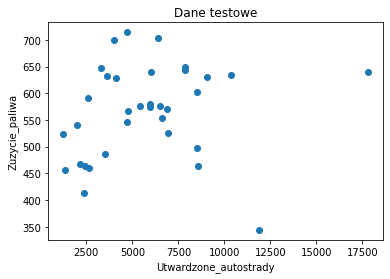

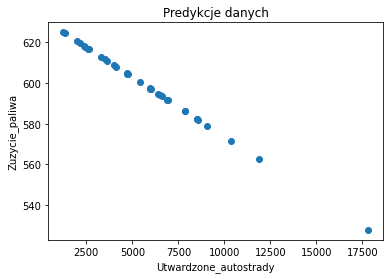

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


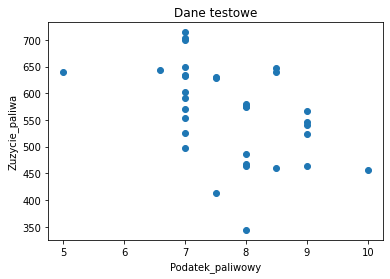

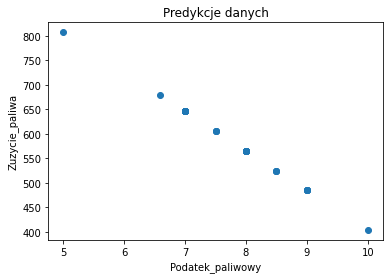

In [147]:
ds = pd.read_csv('PETROL.csv')
y = ds['Zuzycie_paliwa']
X1 = ds['Procent_ludnosci_z_prawem_jazdy']
X2 = ds['Sredni_przychod']
X3 = ds['Utwardzone_autostrady']
X4 = ds['Podatek_paliwowy']
X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, X4_train, X4_test, y_train, y_test = train_test_split(X1, X2, X3, X4, y, test_size=0.70)
regr1 = LinearRegression()
regr2 = LinearRegression()
regr3 = LinearRegression()
regr4 = LinearRegression()
regr1.fit(X1_train[:, np.newaxis], y_train)
print("Współczyniik coef " + str(regr1.coef_))
print("Współczynnik intercept " + str(regr1.intercept_))
regr2.fit(X2_train[:, np.newaxis], y_train)
print("Współczyniik coef " + str(regr2.coef_))
print("Współczynnik intercept " + str(regr2.intercept_))
regr3.fit(X3_train[:, np.newaxis], y_train)
print("Współczyniik coef " + str(regr3.coef_))
print("Współczynnik intercept " + str(regr3.intercept_))
regr4.fit(X4_train[:, np.newaxis], y_train)
print("Współczyniik coef " + str(regr4.coef_))
print("Współczynnik intercept " + str(regr4.intercept_))
pred_y1 = regr1.predict(X1_test[:, np.newaxis])
plt.scatter(X1_test, y_test)
plt.title("Dane testowe")
plt.xlabel('Procent_ludnosci_z_prawem_jazdy')
plt.ylabel('Zuzycie_paliwa')
plt.show()
plt.scatter(X1_test, pred_y1)
plt.title("Predykcje danych")
plt.xlabel('Procent_ludnosci_z_prawem_jazdy')
plt.ylabel('Zuzycie_paliwa')
plt.show()
pred_y2 = regr2.predict(X2_test[:, np.newaxis])
plt.scatter(X2_test, y_test)
plt.title("Dane testowe")
plt.xlabel('Sredni_przychod')
plt.ylabel('Zuzycie_paliwa')
plt.show()
plt.scatter(X2_test, pred_y2)
plt.title("Predykcje danych")
plt.xlabel('Sredni_przychod')
plt.ylabel('Zuzycie_paliwa')
plt.show()
pred_y3 = regr3.predict(X3_test[:, np.newaxis])
plt.scatter(X3_test, y_test)
plt.title("Dane testowe")
plt.xlabel('Utwardzone_autostrady')
plt.ylabel('Zuzycie_paliwa')
plt.show()
plt.scatter(X3_test, pred_y3)
plt.title("Predykcje danych")
plt.xlabel('Utwardzone_autostrady')
plt.ylabel('Zuzycie_paliwa')
plt.show()
pred_y4 = regr4.predict(X4_test[:, np.newaxis])
plt.scatter(X4_test, y_test)
plt.title("Dane testowe")
plt.xlabel('Podatek_paliwowy')
plt.ylabel('Zuzycie_paliwa')
plt.show()
plt.scatter(X4_test, pred_y4)
plt.title("Predykcje danych")
plt.xlabel('Podatek_paliwowy')
plt.ylabel('Zuzycie_paliwa')
plt.show()

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
0     28    1   2      130  132   0       2     185     0      0.0           0
1     29    1   2      120  243   0       0     160     0      0.0           0
3     30    0   1      170  237   0       1     170     0      0.0           0
4     31    0   2      100  219   0       1     150     0      0.0           0
5     32    0   2      105  198   0       0     165     0      0.0           0
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...         ...
289   52    1   4      160  331   0       0      94     1      2.5           1
290   54    0   3      130  294   0       1     100     1      0.0           1
291   56    1   4      155  342   1       0     150     1      3.0           1
292   58    0   2      180  393   0       0     110     1      1.0           1
293   65    1   4      130  275   0       1     115     1      1.0           1

[261 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futur

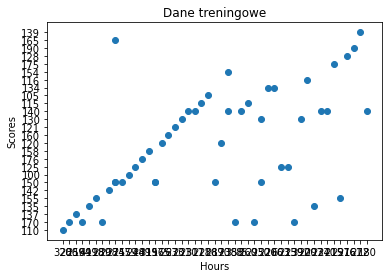

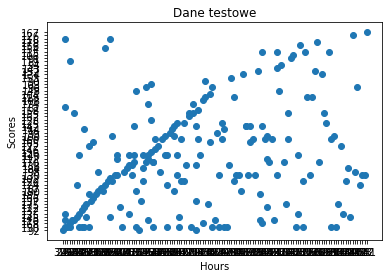

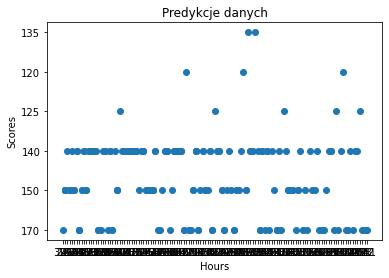

bląd bezwględny 23.69377990430622
bląd sredniokwadratowy 933.7607655502393
pierwiastek_blau_sredniokwadratowego 30.557499334046287
              precision    recall  f1-score   support

         100       0.00      0.00      0.00         5
         102       0.00      0.00      0.00         1
         103       0.00      0.00      0.00         1
         106       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         110       0.00      0.00      0.00         7
         112       0.00      0.00      0.00         3
         115       0.00      0.00      0.00         4
         116       0.00      0.00      0.00         2
         118       0.00      0.00      0.00         4
         119       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         8
         122       0.00      0.00      0.00         4
         124       0.00      0.00      0.00         4
         125       0.00      0.00      0.00         4
    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
from sklearn.metrics import classification_report
ds = pd.read_csv('HEART.csv')
ds = ds[ds!='?']
ds.drop('slope', axis=1, inplace=True)
ds.drop('ca', axis=1, inplace=True)
ds.drop('thal', axis=1, inplace=True)
ds = ds.dropna(axis = 0)
print(ds)
cp = pd.get_dummies(ds['cp'])
restecg = pd.get_dummies(ds['restecg'])
X = ds['chol']
y = ds['thalach']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)
regr = LogisticRegression()
regr.fit(X_train[:, np.newaxis], y_train)
pred_y = regr.predict(X_test[:, np.newaxis])
plt.scatter(X_train, y_train)
plt.title("Dane treningowe")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
plt.scatter(X_test, y_test)
plt.title("Dane testowe")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
plt.scatter(X_test, pred_y)
plt.title("Predykcje danych")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
blad_bezwzgledny = mean_absolute_error(y_test, pred_y)
print("bląd bezwględny " + str(blad_bezwzgledny))
blad_sredniokwadratowy = mean_squared_error(y_test, pred_y)
print("bląd sredniokwadratowy " + str(blad_sredniokwadratowy))
pierwiastek_blau_sredniokwadratowego = np.sqrt(blad_sredniokwadratowy)
print("pierwiastek_blau_sredniokwadratowego " + str(pierwiastek_blau_sredniokwadratowego))
print(classification_report(y_test, pred_y))